In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosistest, skewtest
from scipy.stats import kurtosis, skew
from scipy.stats import cauchy
import scipy.stats as stats
from astropy.stats import median_absolute_deviation
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 22})
plt.tick_params(labelsize=30)
import matplotlib.ticker as mtick
%matplotlib inline

In [11]:
# Import acceleration data from accelerometer
data_diesel = pd.read_csv("data.csv") # iesel train data
data_electric = pd.read_csv("data_electric_caltrain.csv") # electric train data

In [13]:
# Get Diesel Caltrain XYZ  acceleration data
Accel_X_diesel = data_diesel['Accelerometer_X']
Accel_Y_diesel = data_diesel['Accelerometer_Y']
Accel_Z_diesel = data_diesel['Accelerometer_Z'] - 1 # Adjust for baseline gravity on Z-axis

# Calculate % change in values, clean data
X_change_diesel = Accel_X_diesel.pct_change(1).replace([np.inf, -np.inf], np.nan).dropna()
Y_change_diesel = Accel_Y_diesel.pct_change(1).replace([np.inf, -np.inf], np.nan).dropna()
Z_change_diesel = Accel_Z_diesel.pct_change(1).replace([np.inf, -np.inf], np.nan).dropna()

In [14]:
# Get Electric Caltrain XYZ  acceleration data
Accel_X_electric = data_electric['Accelerometer_X']
Accel_Y_electric = data_electric['Accelerometer_Y']
Accel_Z_electric = data_electric['Accelerometer_Z'] - 1 # Adjust for baseline gravity on Z-axis

# Calculate % change in values, clean data
X_change_electric = Accel_X_electric.pct_change(1).replace([np.inf, -np.inf], np.nan).dropna()
Y_change_electric = Accel_Y_electric.pct_change(1).replace([np.inf, -np.inf], np.nan).dropna()
Z_change_electric = Accel_Z_electric.pct_change(1).replace([np.inf, -np.inf], np.nan).dropna()

In [15]:
Y_change_electric.describe()

count    219867.000000
mean         -0.025557
std           6.139336
min       -1246.721311
25%           0.000000
50%           0.000000
75%           0.000000
max        1053.606557
Name: Accelerometer_Y, dtype: float64

In [18]:
# Ensure no zero or NaN values in the dataset
print(Accel_X_diesel.isna().sum(), Accel_Y_diesel.isna().sum(), Accel_Z_diesel.isna().sum())
print(Accel_X_electric.isna().sum(), Accel_Y_electric.isna().sum(), Accel_Z_electric.isna().sum())

0 0 0
0 0 0


In [29]:
# Calculate Mean Absolute Deviation
def mean_absolute_deviation(series):
    return np.mean(np.abs(series - np.mean(series)))

# Calculate Median Absolute Deviation
def median_absolute_deviation2(data):
    return np.median(np.abs(data - np.median(data)))

# print("X mean: ", round(np.mean(Accel_X), 2))
# print("Y mean: ", round(np.mean(Accel_Y), 2))
# print("Z mean: ", round(np.mean(Accel_Z), 2))

print("X = Front-Back, Y = Side-to-Side, Z = Up-Down")
print("")
print("Diesel Volatility Calculations:")
print("")
print("X mean absolute deviation: ", round(mean_absolute_deviation(Accel_X_diesel) * 100, 2), "%")
print("Y mean absolute deviation: ", round(mean_absolute_deviation(Accel_Y_diesel) * 100, 2), "%")
print("Z mean absolute deviation: ", round(mean_absolute_deviation(Accel_Z_diesel) * 100, 2), "%")
print("X median absolute deviation: ", round(np.median(np.abs(Accel_X_diesel - np.median(Accel_X_diesel))), 3))
print("Y median absolute deviation: ", round(np.median(np.abs(Accel_Y_diesel - np.median(Accel_Y_diesel))), 3))
print("Z median absolute deviation: ", round(np.median(np.abs(Accel_Z_diesel - np.median(Accel_Z_diesel))), 3))

X_kurt_diesel = round(kurtosis(Accel_X_diesel), 2)
Y_kurt_diesel = round(kurtosis(Accel_Y_diesel), 2)
Z_kurt_diesel = round(kurtosis(Accel_Z_diesel), 2)

X_change_kurt_diesel = round(kurtosis(X_change_diesel), 2)
Y_change_kurt_diesel = round(kurtosis(Y_change_diesel), 2)
Z_change_kurt_diesel = round(kurtosis(Z_change_diesel), 2)

print("X Kurtosis:", X_kurt_diesel)
print("Y Kurtosis:", Y_kurt_diesel)
print("Z Kurtosis:", Z_kurt_diesel)

print("")
print("Electric Volatility Calculations:")
print("")

print("X mean absolute deviation: ", round(mean_absolute_deviation(Accel_X_electric) * 100, 2), "%")
print("Y mean absolute deviation: ", round(mean_absolute_deviation(Accel_Y_electric) * 100, 2), "%")
print("Z mean absolute deviation: ", round(mean_absolute_deviation(Accel_Z_electric) * 100, 2), "%")
print("X median absolute deviation: ", round(np.median(np.abs(Accel_X_electric - np.median(Accel_X_electric))), 3))
print("Y median absolute deviation: ", round(np.median(np.abs(Accel_Y_electric - np.median(Accel_Y_electric))), 3))
print("Z median absolute deviation: ", round(np.median(np.abs(Accel_Z_electric - np.median(Accel_Z_electric))), 3))

X_kurt_electric = round(kurtosis(Accel_X_electric), 2)
Y_kurt_electric = round(kurtosis(Accel_Y_electric), 2)
Z_kurt_electric = round(kurtosis(Accel_Z_electric), 2)

X_change_kurt_electric = round(kurtosis(X_change_electric), 2)
Y_change_kurt_electric = round(kurtosis(Y_change_electric), 2)
Z_change_kurt_electric = round(kurtosis(Z_change_electric), 2)

print("X Kurtosis:", X_kurt_electric)
print("Y Kurtosis:", Y_kurt_electric)
print("Z Kurtosis:", Z_kurt_electric)

X = Front-Back, Y = Side-to-Side, Z = Up-Down

Diesel Volatility Calculations:

X mean absolute deviation:  11.5 %
Y mean absolute deviation:  15.2 %
Z mean absolute deviation:  12.02 %
X median absolute deviation:  0.088
Y median absolute deviation:  0.113
Z median absolute deviation:  0.085
X Kurtosis: 1.36
Y Kurtosis: 1.62
Z Kurtosis: 3.92

Electric Volatility Calculations:

X mean absolute deviation:  3.07 %
Y mean absolute deviation:  4.46 %
Z mean absolute deviation:  4.65 %
X median absolute deviation:  0.024
Y median absolute deviation:  0.032
Z median absolute deviation:  0.03
X Kurtosis: 1.08
Y Kurtosis: 1.64
Z Kurtosis: 3.78


Text(0.5, 0, 'Observations')

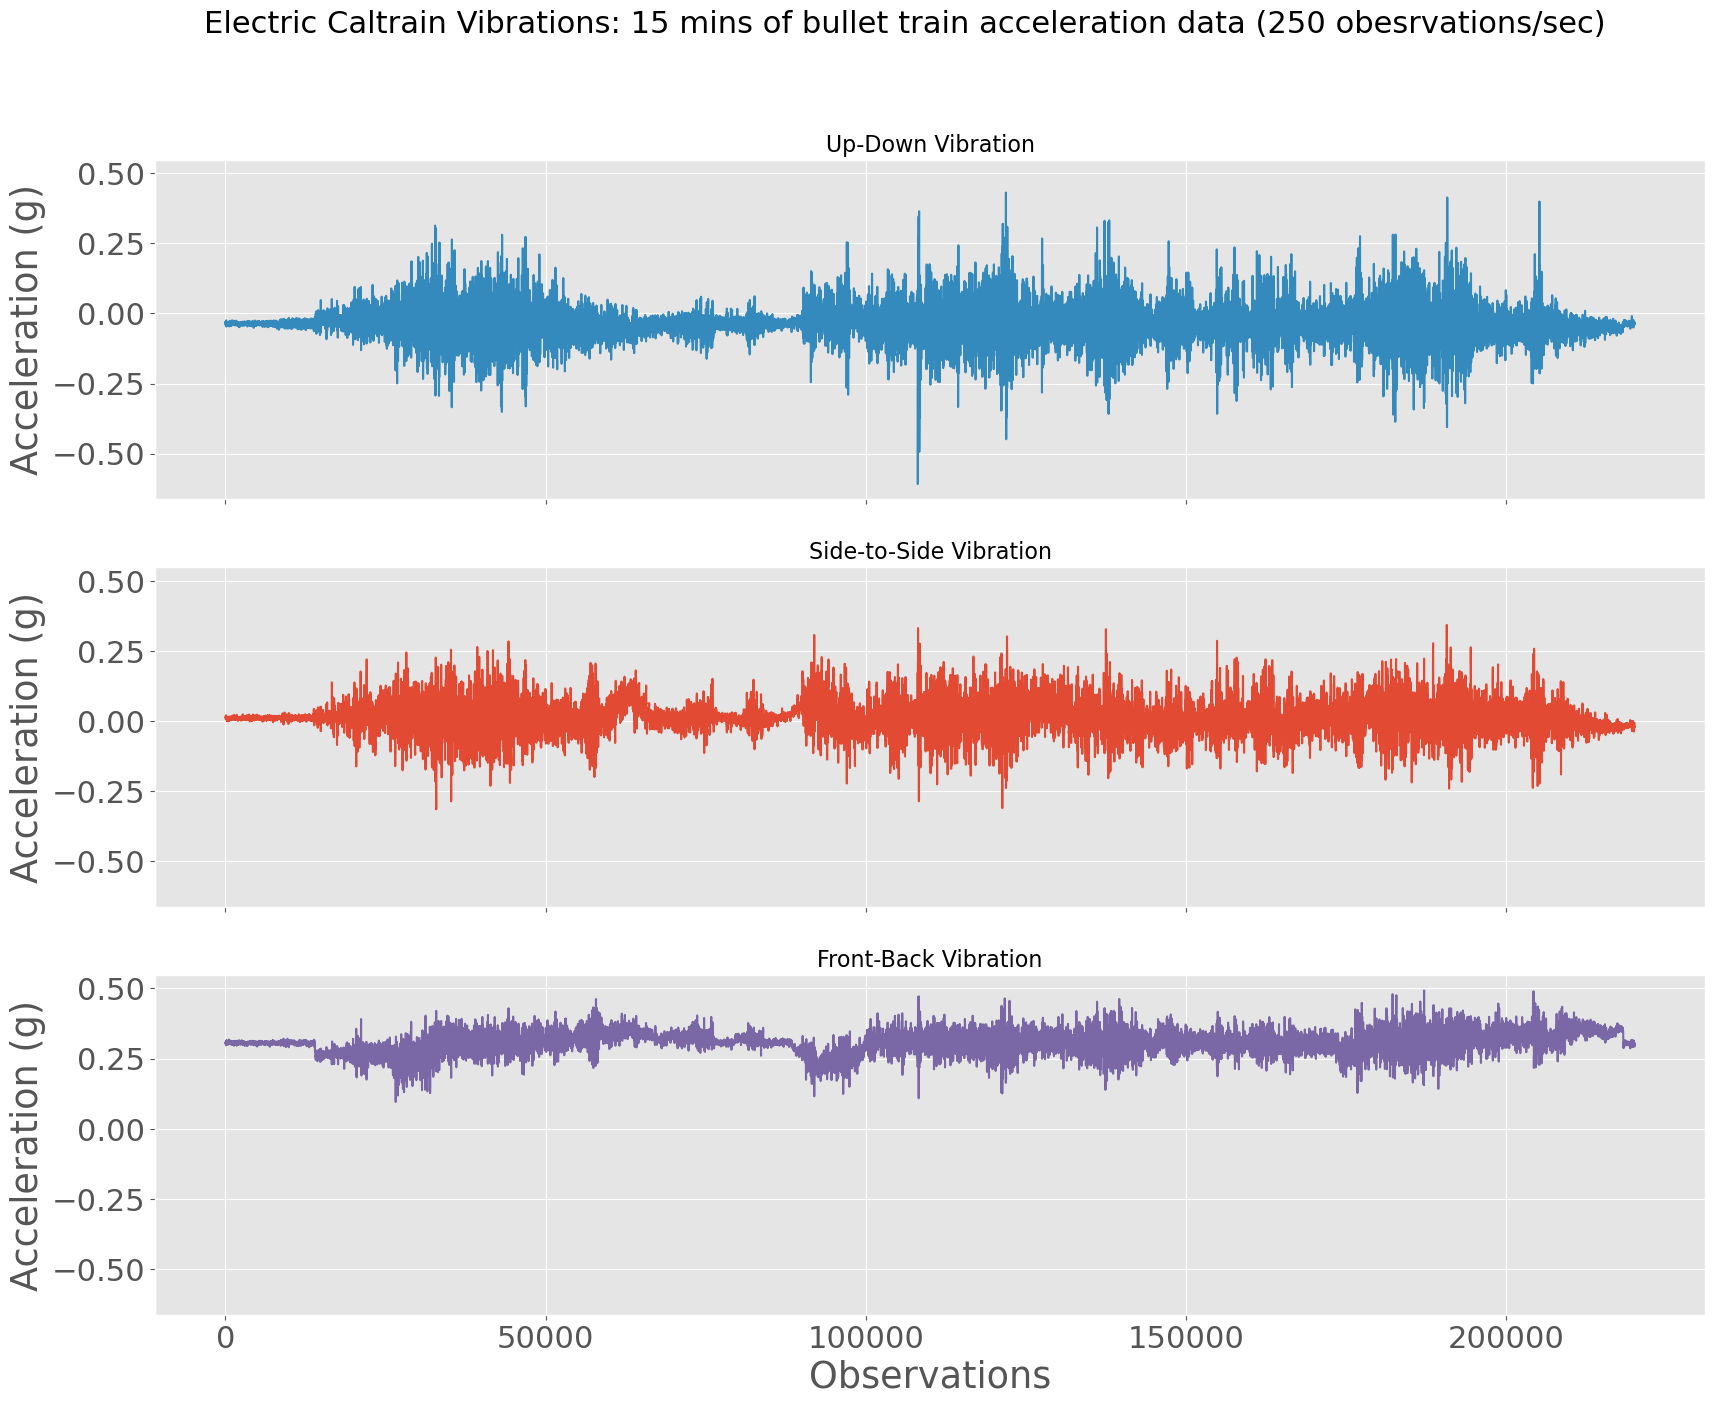

<Figure size 2000x1500 with 0 Axes>

In [47]:
fig, axs = plt.subplots(3, 1, figsize=(20,15), sharex=True, sharey=True)
plt.figure(figsize=(20, 15))
axs[0].plot(Accel_Z, label="Up-Down", color = "#348ABD")
axs[1].plot(Accel_Y, label="Side-to-Side")
axs[2].plot(Accel_X, label="Front-Back", color="#7A68A6")
fig.suptitle('Electric Caltrain Vibrations: 15 mins of bullet train acceleration data (250 obesrvations/sec)', fontsize=22)
axs[0].set_title("Up-Down Vibration", fontsize="16")
axs[1].set_title("Side-to-Side Vibration", fontsize="16")
axs[2].set_title("Front-Back Vibration", fontsize="16")
axs[0].set_ylabel('Acceleration (g)')
axs[1].set_ylabel('Acceleration (g)')
axs[2].set_ylabel('Acceleration (g)')
axs[2].set_xlabel('Observations')

<Figure size 1600x800 with 0 Axes>

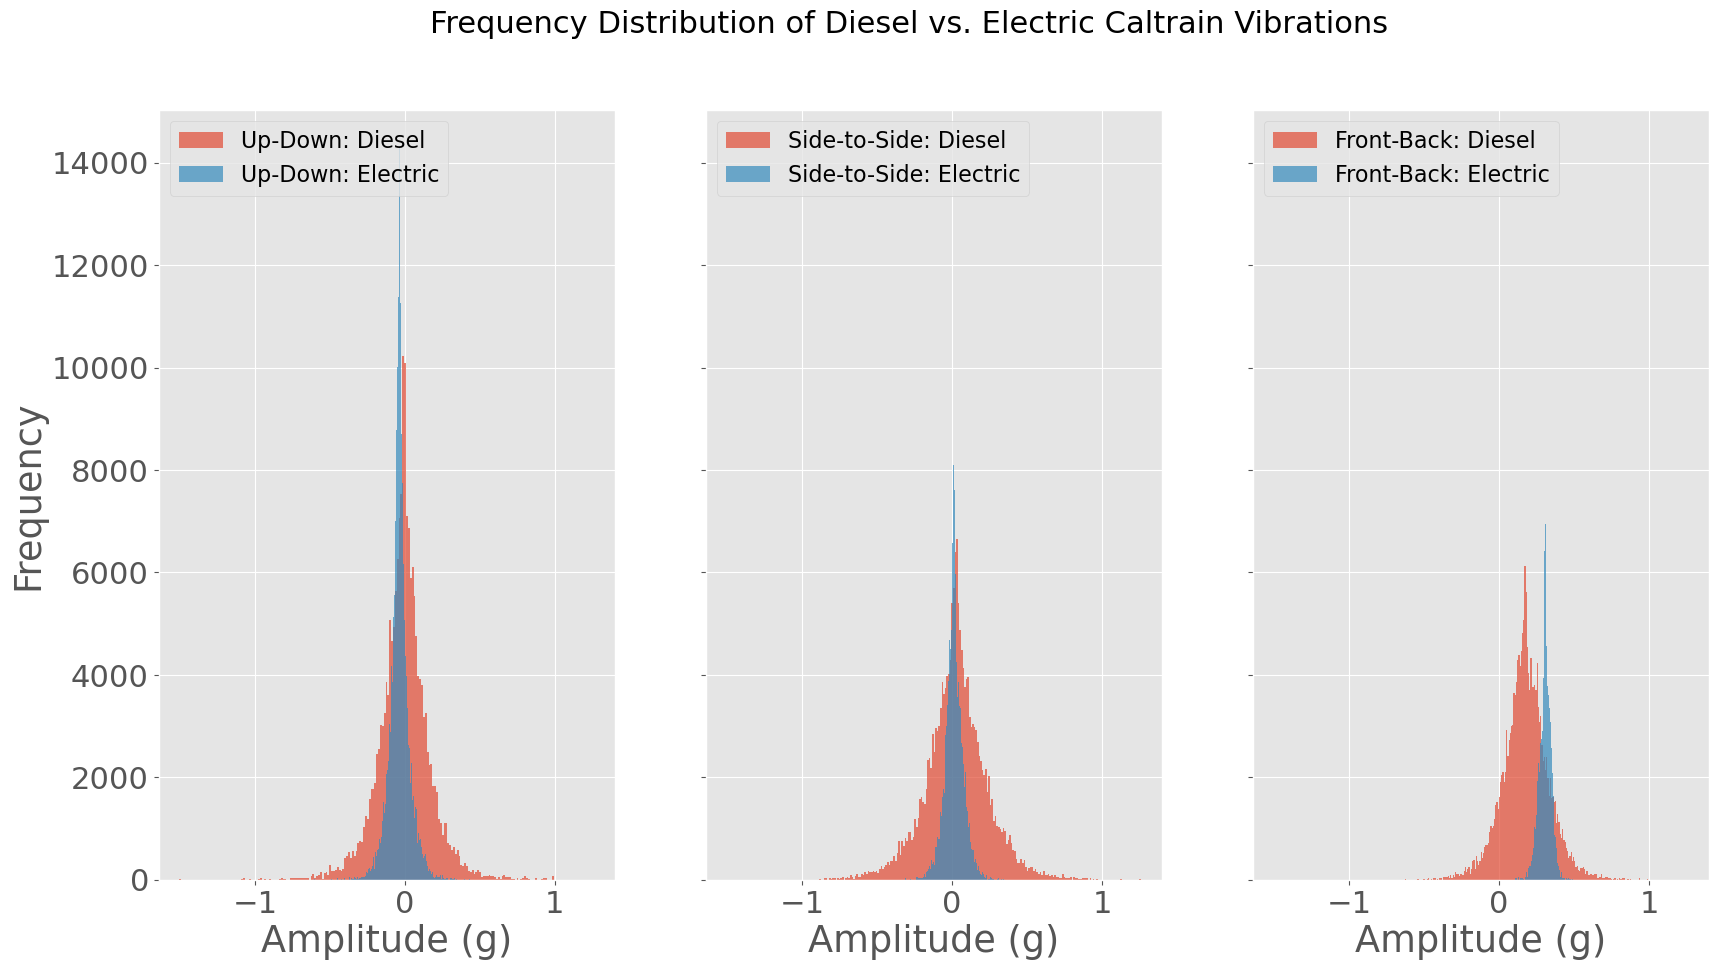

In [58]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

figure(num=None, figsize=(20, 10), dpi=80, edgecolor='k')
fig, axs = plt.subplots(1, 3, figsize=(20,10), sharey=True, sharex=True)

# Remove the 'normed' argument or replace it with 'density=False' if you don't want normalization
axs[0].hist(Accel_Z_diesel, bins=200, log=False, alpha = 0.7, density=False, label='Up-Down: Diesel')
axs[0].hist(Accel_Z_electric, bins=200, log=False, alpha = 0.7, density=False, label='Up-Down: Electric', color = "#348ABD")
axs[1].hist(Accel_Y_diesel, bins=200, log=False, alpha = 0.7, density=False, label='Side-to-Side: Diesel')
axs[1].hist(Accel_Y_electric, bins=200, log=False, alpha = 0.7, density=False, label='Side-to-Side: Electric', color = "#348ABD")
axs[2].hist(Accel_X_diesel, bins=200, log=False, density=False, alpha = 0.7, label='Front-Back: Diesel')
axs[2].hist(Accel_X_electric, bins=200, log=False, density=False, alpha = 0.7, label='Front-Back: Electric', color = "#348ABD")

axs[0].set_ylabel('Frequency')
axs[0].set_xlabel('Amplitude (g)')
axs[1].set_xlabel('Amplitude (g)')
axs[2].set_xlabel('Amplitude (g)')

axs[0].legend(loc=2, prop={'size': 16})
axs[1].legend(loc=2, prop={'size': 16})
fig.suptitle('Frequency Distribution of Diesel vs. Electric Caltrain Vibrations', fontsize=22)

plt.legend(loc=2, prop={'size': 16})
plt.show()


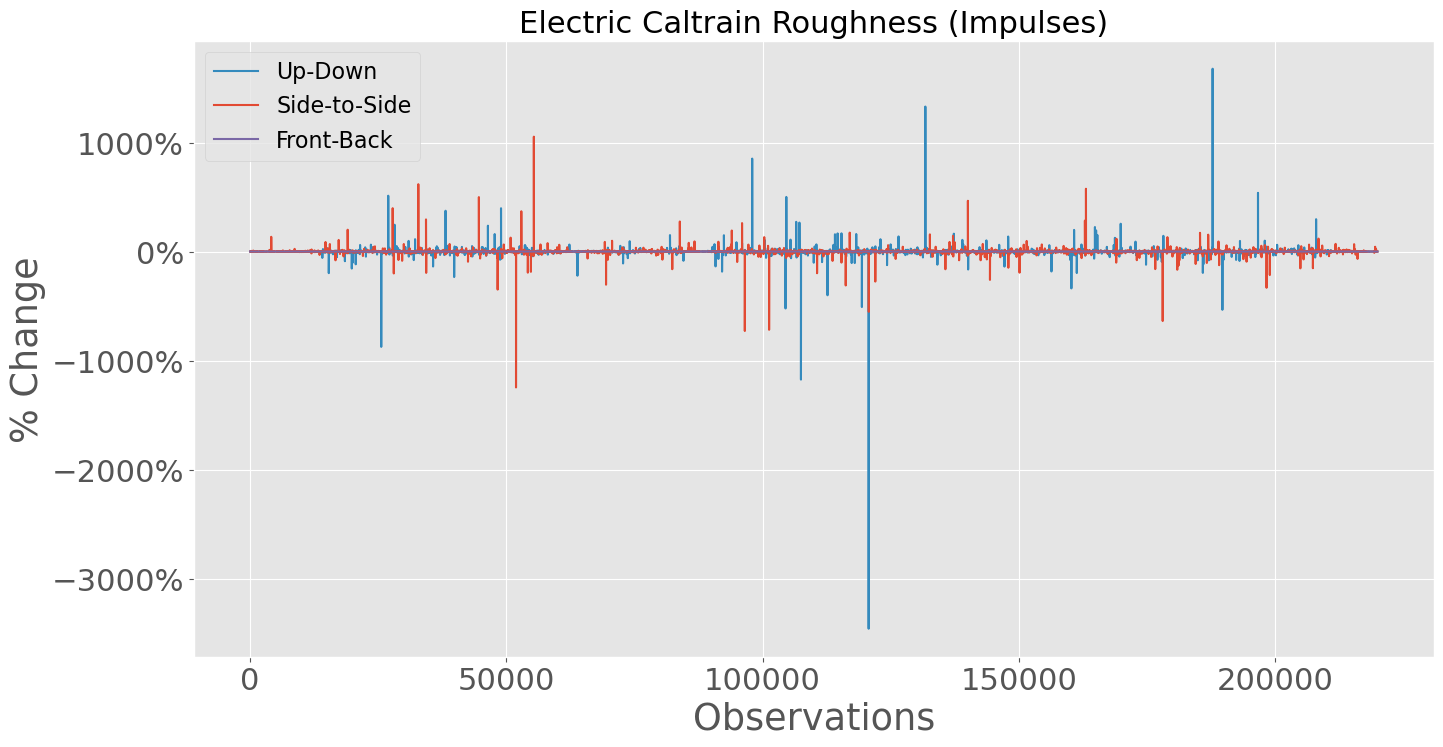

In [30]:
plt.figure(figsize=(20, 20))
#plt.plot(Z_change, label="Z direction")
#plt.plot(Y_change, label="Y Direction")

Z_change_electric.plot(label='Up-Down', figsize=(16,8), color = "#348ABD").yaxis.set_major_formatter(mtick.PercentFormatter())
Y_change_electric.plot(label='Side-to-Side', figsize=(16,8)).yaxis.set_major_formatter(mtick.PercentFormatter())
X_change_electric.plot(label='Front-Back', color = "#7A68A6", figsize=(16,8)).yaxis.set_major_formatter(mtick.PercentFormatter())

plt.title('Electric Caltrain Roughness (Impulses)', fontsize=22)
plt.xlabel('Observations')
plt.ylabel('% Change')
plt.legend(loc=2, prop={'size': 16})

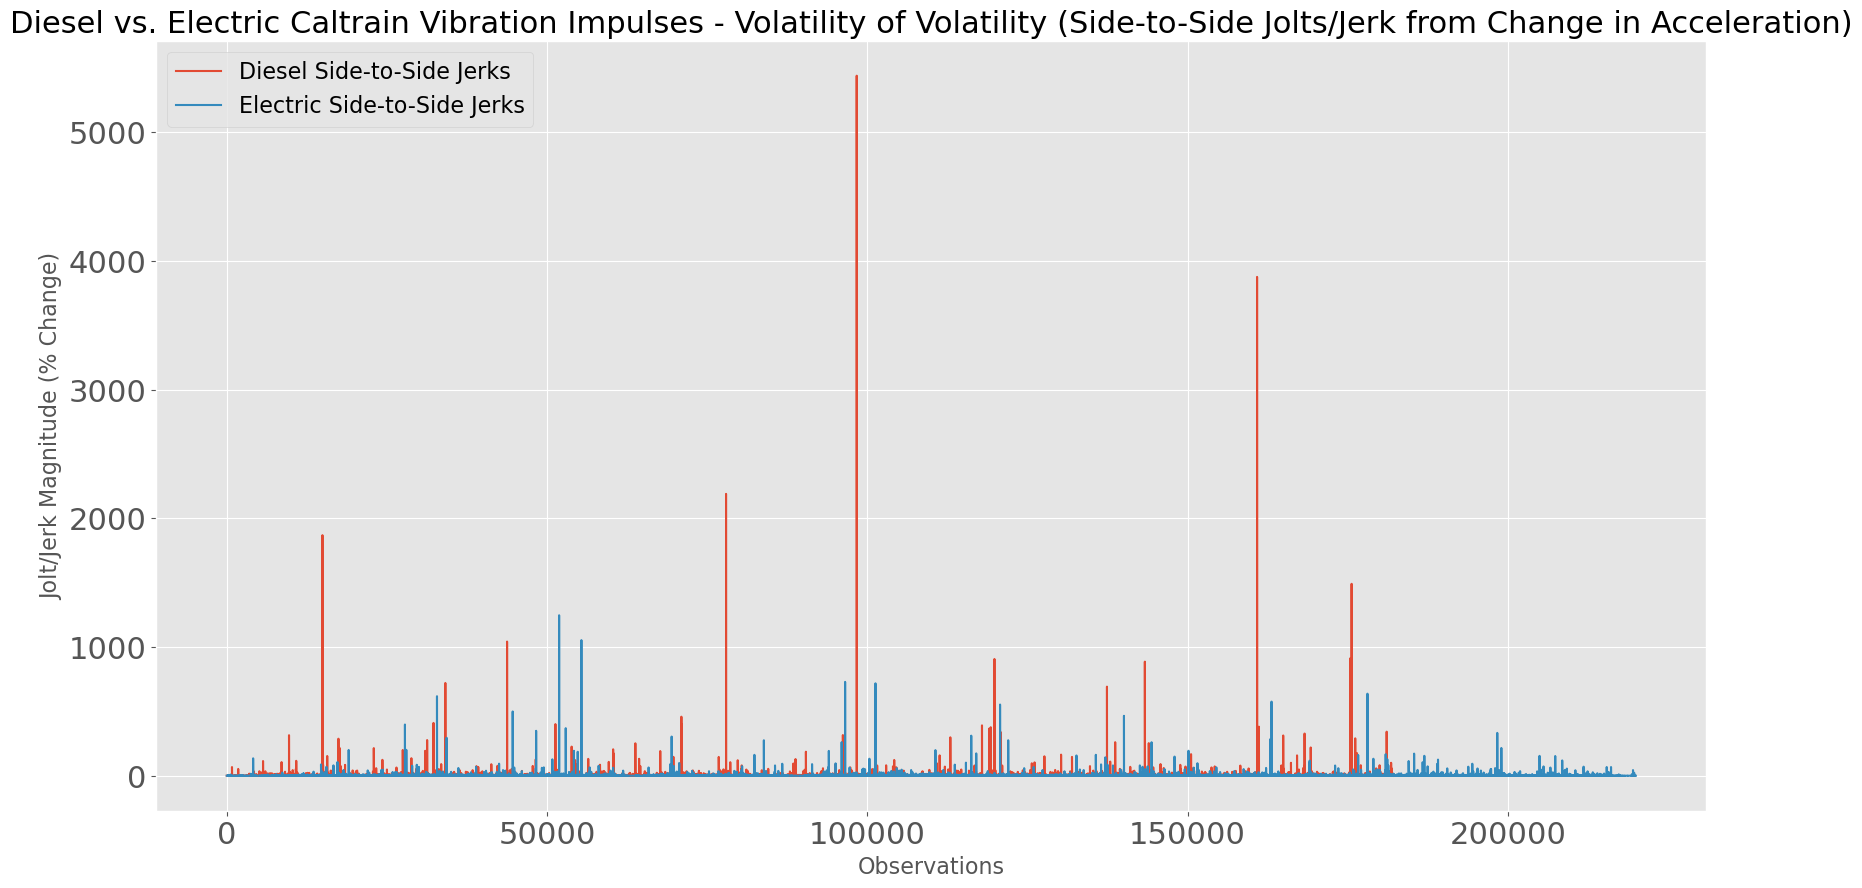

In [38]:
# Calculate absolute value of the % change (which represents the magnitude of jerks)
jerk_data_pct = pd.DataFrame({
    'Y_jerk_pct_diesel': np.abs(Y_change_diesel),
    'Y_jerk_pct_electric': np.abs(Y_change_electric)
})

# Plot the absolute value of the % change (jerks/jolts)
plt.figure(figsize=(20, 10))
plt.plot(jerk_data_pct['Y_jerk_pct_diesel'], label='Diesel Side-to-Side Jerks')
plt.plot(jerk_data_pct['Y_jerk_pct_electric'], label='Electric Side-to-Side Jerks', color="#348ABD")

plt.title('Diesel vs. Electric Caltrain Vibration Impulses - Volatility of Volatility (Side-to-Side Jolts/Jerk from Change in Acceleration)', fontsize=22)
plt.ylabel('Jolt/Jerk Magnitude (% Change)', fontsize=16)
plt.xlabel('Observations', fontsize=16)
plt.legend(loc=2, prop={'size': 16})
plt.show()

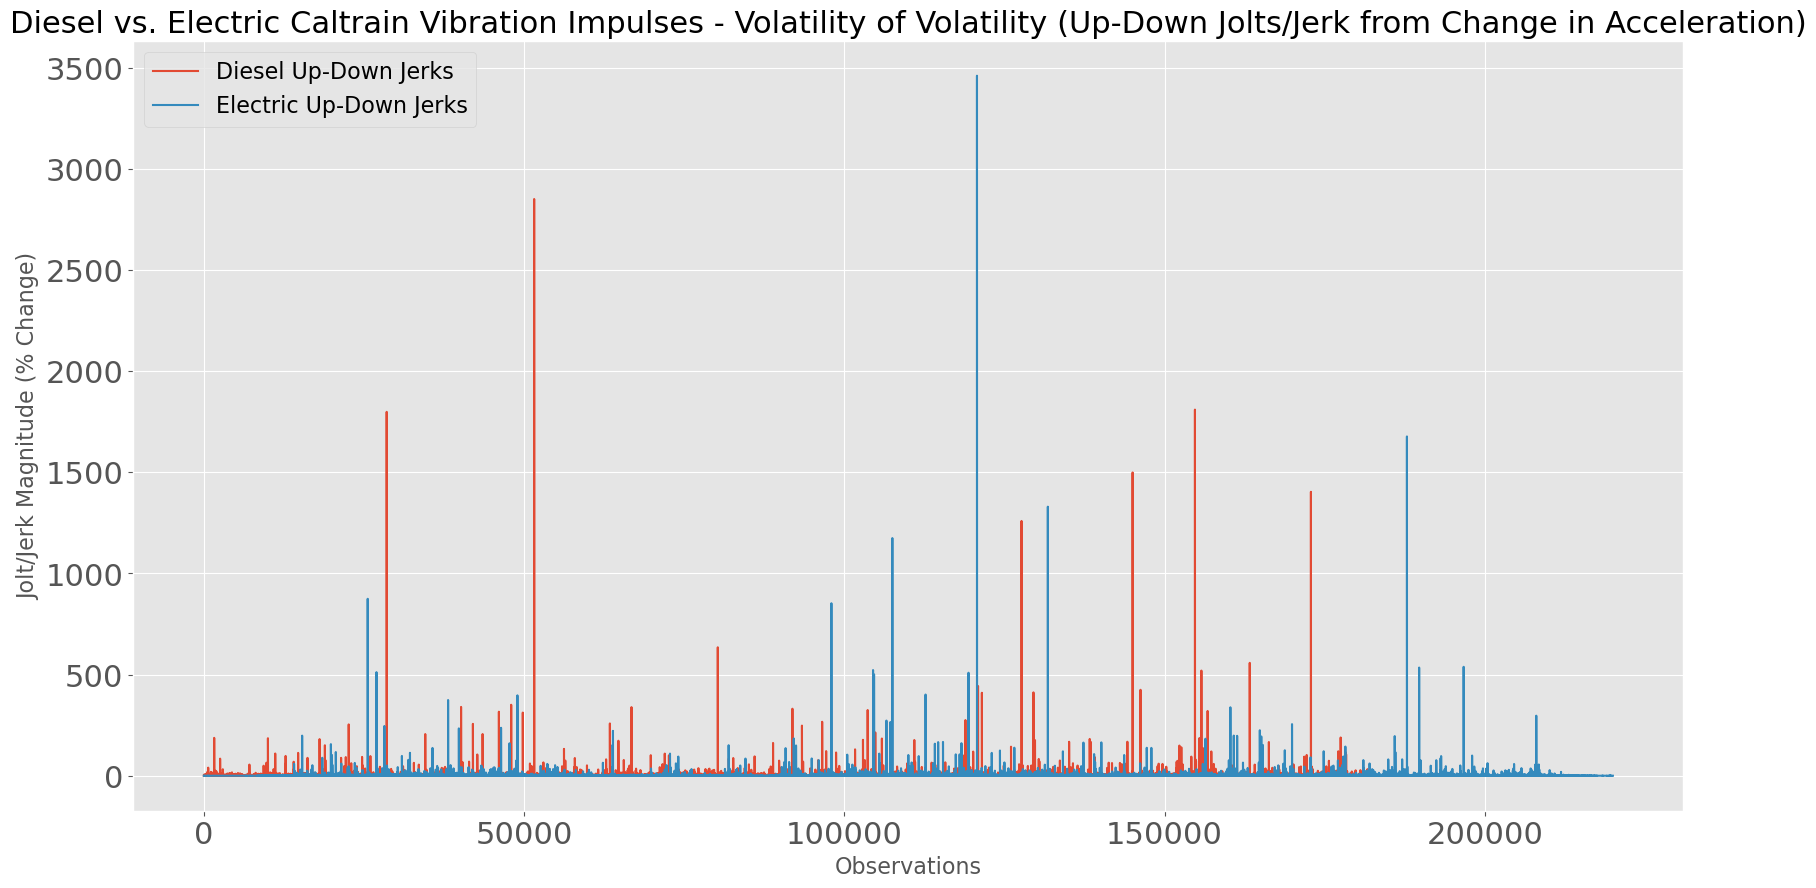

In [39]:
# Calculate absolute value of the % change (which represents the magnitude of jerks)
jerk_data_pct = pd.DataFrame({
    'Z_jerk_pct_diesel': np.abs(Z_change_diesel),
    'Z_jerk_pct_electric': np.abs(Z_change_electric)
})

# Plot the absolute value of the % change (jerks/jolts)
plt.figure(figsize=(20, 10))
plt.plot(jerk_data_pct['Z_jerk_pct_diesel'], label='Diesel Up-Down Jerks')
plt.plot(jerk_data_pct['Z_jerk_pct_electric'], label='Electric Up-Down Jerks', color="#348ABD")

plt.title('Diesel vs. Electric Caltrain Vibration Impulses - Volatility of Volatility (Up-Down Jolts/Jerk from Change in Acceleration)', fontsize=22)
plt.ylabel('Jolt/Jerk Magnitude (% Change)', fontsize=16)
plt.xlabel('Observations', fontsize=16)
plt.legend(loc=2, prop={'size': 16})
plt.show()

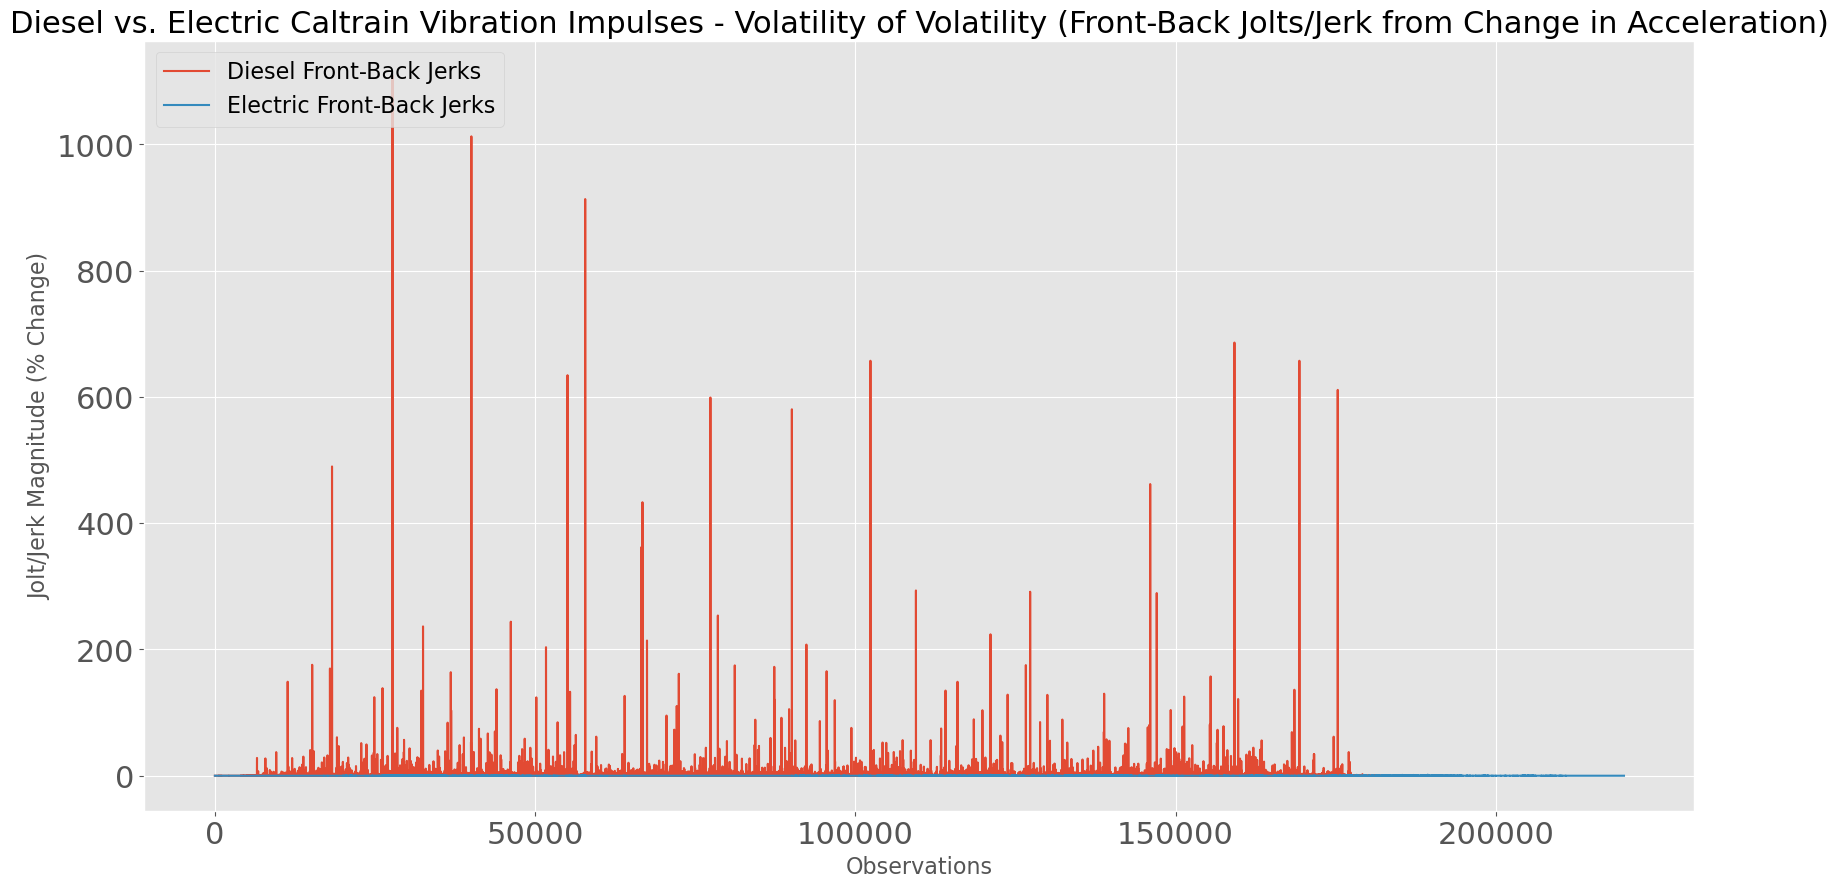

In [61]:
# Calculate absolute value of the % change (which represents the magnitude of jerks)
jerk_data_pct = pd.DataFrame({
    'X_jerk_pct_diesel': np.abs(X_change_diesel),
    'X_jerk_pct_electric': np.abs(X_change_electric)
})

# Plot the absolute value of the % change (jerks/jolts)
plt.figure(figsize=(20, 10))
plt.plot(jerk_data_pct['X_jerk_pct_diesel'], label='Diesel Front-Back Jerks')
plt.plot(jerk_data_pct['X_jerk_pct_electric'], label='Electric Front-Back Jerks', color="#348ABD")

plt.title('Diesel vs. Electric Caltrain Vibration Impulses - Volatility of Volatility (Front-Back Jolts/Jerk from Change in Acceleration)', fontsize=22)
plt.ylabel('Jolt/Jerk Magnitude (% Change)', fontsize=16)
plt.xlabel('Observations', fontsize=16)
plt.legend(loc=2, prop={'size': 16})
plt.show()